In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 10



In [3]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)



In [4]:
train_generator = train_datagen.flow_from_directory(
    "Bellpepper",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)



Found 1981 images belonging to 2 classes.


In [6]:


validation_generator = train_datagen.flow_from_directory(
    "Bellpepper",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)


Found 494 images belonging to 2 classes.


In [7]:

class_names = train_generator.class_indices
print(class_names)

{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1}


In [8]:

# Model Definition
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax'),
])



In [9]:
# Model Compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [10]:
# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)



Epoch 1/10


61/61 [==============================] - 67s 1s/step - loss: 0.5352 - accuracy: 0.7604 - val_loss: 0.2879 - val_accuracy: 0.9042
Epoch 2/10
61/61 [==============================] - 53s 868ms/step - loss: 0.3141 - accuracy: 0.8897 - val_loss: 0.2513 - val_accuracy: 0.9104
Epoch 3/10
61/61 [==============================] - 53s 863ms/step - loss: 0.2420 - accuracy: 0.9246 - val_loss: 0.2149 - val_accuracy: 0.9354
Epoch 4/10
61/61 [==============================] - 52s 854ms/step - loss: 0.2182 - accuracy: 0.9246 - val_loss: 0.1808 - val_accuracy: 0.9333
Epoch 5/10
61/61 [==============================] - 52s 854ms/step - loss: 0.1753 - accuracy: 0.9513 - val_loss: 0.1067 - val_accuracy: 0.9667
Epoch 6/10
61/61 [==============================] - 53s 865ms/step - loss: 0.0932 - accuracy: 0.9769 - val_loss: 0.0845 - val_accuracy: 0.9792
Epoch 7/10
61/61 [==============================] - 57s 931ms/step - loss: 0.0414 - accuracy: 0.9897 - val_loss: 0.1145 - val_accuracy: 0.9646


In [11]:
# Model Evaluation
scores = model.evaluate(validation_generator)
print("Validation Loss:", scores[0])
print("Validation Accuracy:", scores[1])



16/16 [==============================] - 7s 437ms/step - loss: 0.0674 - accuracy: 0.9899
Validation Loss: 0.06742843985557556
Validation Accuracy: 0.9898785352706909


In [14]:
# Saving the Model
model.save("bellpepperemodelnew.h5")

C:\Users\Kusal\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import random

BATCH_SIZE = 32
IMAGE_SIZE = 256

# Load the saved model
model = tf.keras.models.load_model("bellpepperemodelnew.h5")

# Path to the directory containing test images
test_dir = "test_data"

# Get list of test images
test_images = [os.path.join(test_dir, img) for img in os.listdir(test_dir)]

# Mapping class indices to class labels
class_labels = {0: "Potato___Early_blight", 1: "Potato___Late_blight", 2: "Potato___healthy"}  # Update with your actual class labels

# Function to preprocess image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale and expand dimensions
    return img, img_array

# Select 20 random images
random_test_images = random.sample(test_images, 20)

# Perform predictions and display images
for img_path in random_test_images:
    img, preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)

    # Display image
    plt.imshow(img)
    plt.axis('off')

    # Display prediction
    actual_label = img_path.split(os.path.sep)[-1].split("_")[0]  # Extracting actual label from image file name
    predicted_label = class_labels[np.argmax(prediction)]  # Getting predicted label
    prediction_probabilities = prediction[0]
    print("Image:", img_path)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("Prediction Probabilities:", prediction_probabilities)
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}\nProbabilities: {prediction_probabilities}")
    plt.show()




ValueError: Sample larger than population or is negative

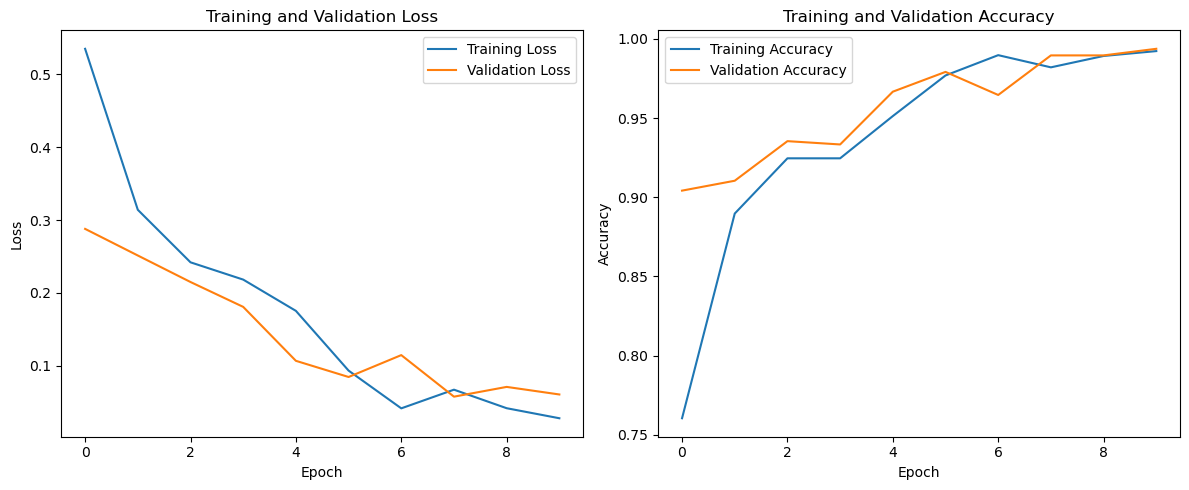

16/16 [==============================] - 7s 440ms/step


In [16]:
import numpy as np
from sklearn.metrics import roc_curve, auc

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Compute predictions and true labels for the validation set
predictions = model.predict(validation_generator)
y_true = validation_generator.classes


